# 単回帰

## ライブラリーのインポート

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## データセットのインポート

In [57]:
# データセットをロード
dataset = datasets.fetch_california_housing()

# 一意なクラスラベルを出力
print('特徴量:', dataset.feature_names)
print('目的変数:', dataset.target_names)

特徴量: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
目的変数: ['MedHouseVal']


## データセットの確認

In [58]:
pd.set_option('display.max_columns', None)
# データセットの特徴量をDataFrameに変換
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# 目標変数をDataFrameに追加
df[dataset['target_names'][0]] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [59]:
print(f'データの形式：{df.shape}')
print(f'欠損値の数：{df.isnull().sum().sum()}')

データの形式：(20640, 9)
欠損値の数：0


## 説明変数と目的変数に分割

In [60]:
select_features = ['MedInc']
X = df.loc[:1000, select_features].values #説明のため1000としている
y = df.loc[:1000, dataset['target_names'][0]].values

KeyError: 'target'

## 訓練データとテストデータに分割

In [61]:
# 全体の30%をテストデータととする
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

## 訓練データによるモデルの学習

In [62]:
# 単回帰のインスタンスを作成
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## 新しいデータポイントでの予測

In [63]:
# 新しいデータポイントで予測
new_data = [[0.8]]
pred_label = regressor.predict(new_data)[0]
print(f'予測した{dataset.target_names}の値: {pred_label:.3f}')

予測した['MedHouseVal']の値: 0.966


## テストデータで予測

In [64]:
# テストデータで予測を実施
y_pred = regressor.predict(X_test)

## モデルの性能評価

In [65]:
# MSEの計算(0に近いほど良いとされている)
print(f'MSE: {mean_squared_error(y_test, y_pred):.3f}' )

# R^2を計算(1に近いほど良いとされている,0に近いほど悪い,符の値は浮上に悪いモデル)
print(f'R^2: {r2_score(y_test, y_pred):.3f}')


MSE: 0.341
R^2: 0.604


## 性能評価の可視化

In [66]:
# 訓練データとテストデータの最小値と最大値を計算
def calculate_bounds(X):
    X_min, X_max = X.min() - (X.max() - X.min()) / 20, X.max() + (X.max() - X.min()) / 20
    return X_min, X_max

In [67]:
def plot_data(ax, X_set, y_set, X_min, X_max, regressor, kind):
    X_range = np.linspace(X_min, X_max, 100).reshape(-1, 1)
    y_pred = regressor.predict(X_range)
    
    ax.scatter(X_set, y_set, color='red', alpha=0.5, marker='o', edgecolor='black', label='Actual')
    ax.plot(X_range, y_pred, color='blue', label='Prediction')
    
    ax.set_xlabel(select_features[0])
    ax.set_ylabel(dataset['target_names'][0])
    ax.set_title(f'Linear Regression ({kind})')
    ax.legend(loc='best')

In [68]:
def plot_regression_performance(X_train, X_test, y_train, y_test, regressor):
    # 訓練データとテストデータの範囲を統一
    X_combined = np.vstack((X_train, X_test))
    X_min, X_max = calculate_bounds(X_combined)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # 訓練データとテストデータのプロット
    plot_data(ax[0], X_train, y_train, X_min, X_max, regressor, "Training set")
    plot_data(ax[1], X_test, y_test, X_min, X_max, regressor, "Test set")
    
    plt.tight_layout()
    plt.show()

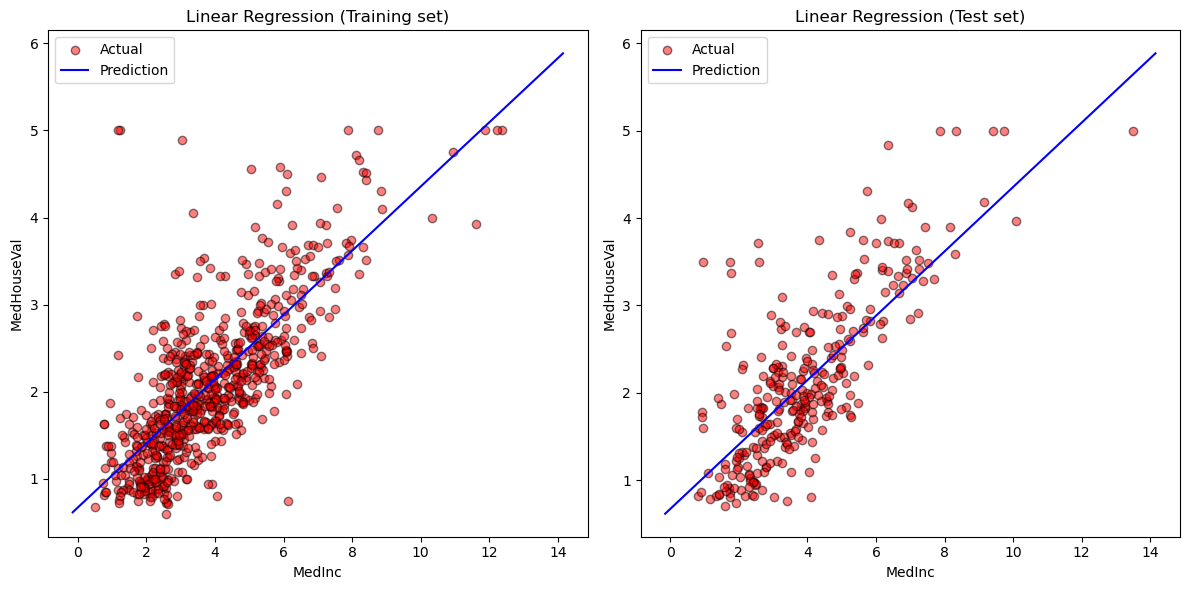

In [69]:
plot_regression_performance(X_train, X_test, y_train, y_test, regressor)